## Multiclass Classification using Logistic Regression

In [39]:
# Chequear GPU
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0
Num GPUs Available:  1


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import keras.utils as image
from keras.applications.mobilenet import preprocess_input
from keras.applications import MobileNet
from keras.models import Model
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [41]:
#Exploramos las carpetas...
import os
for dir, dirname, files in os.walk('movie_dataset'):
  print(f"Dir: {dir} | subdir: {dirname} | cant de imagenes: {len(files)} ")

Dir: movie_dataset | subdir: ['test', 'train'] | cant de imagenes: 0 
Dir: movie_dataset\test | subdir: ['El caballero oscuro', 'El padrino', 'El señor de los anillos El retorno del rey', 'Titanic'] | cant de imagenes: 0 
Dir: movie_dataset\test\El caballero oscuro | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\test\El padrino | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\test\El señor de los anillos El retorno del rey | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\test\Titanic | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\train | subdir: ['El caballero oscuro', 'El padrino', 'El señor de los anillos El retorno del rey', 'Titanic'] | cant de imagenes: 0 
Dir: movie_dataset\train\El caballero oscuro | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\train\El padrino | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\train\El señor de los anillos El retorno del rey | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\train\Titanic

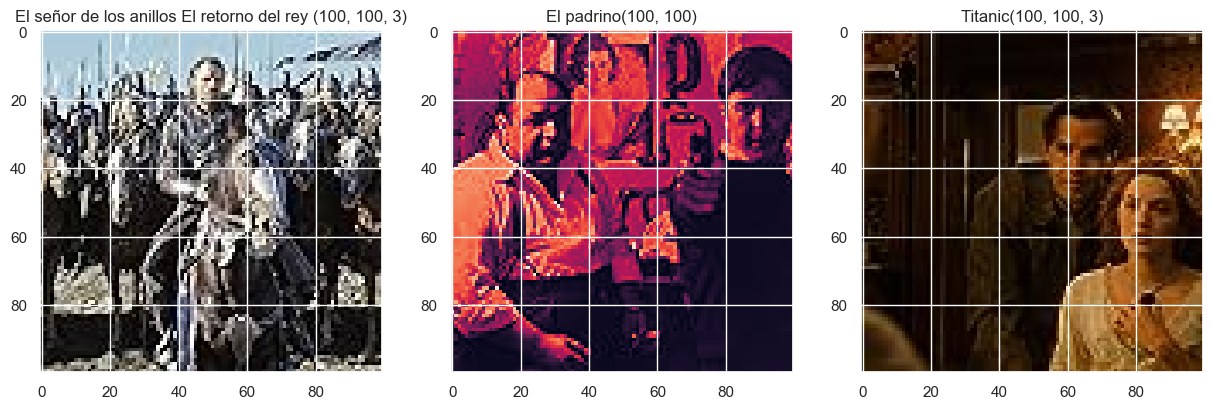

In [42]:
import matplotlib.pyplot as plt
import random, os

plt.figure(figsize=(15,7))
id = random.choice(range(0,16))
plt.subplot(1,3,1)
img_name = [f for f in os.listdir('movie_dataset/train/El señor de los anillos El retorno del rey/')][id]
img = plt.imread('movie_dataset/train/El señor de los anillos El retorno del rey/'+img_name)
plt.imshow(img)
plt.title('El señor de los anillos El retorno del rey '+str(img.shape))
plt.subplot(1,3,2)
img_name = [f for f in os.listdir('movie_dataset/train/El padrino/')][id]
img = plt.imread('movie_dataset/train/El padrino/'+img_name)
plt.imshow(img)
plt.title('El padrino'+str(img.shape))
plt.subplot(1,3,3)
img_name = [f for f in os.listdir('movie_dataset/train/Titanic/')][id]
img = plt.imread('movie_dataset/train/Titanic/'+img_name)
plt.imshow(img)
plt.title('Titanic'+str(img.shape));

In [43]:
#Exploramos los características de las imágenes
list_img_film = [f for f in os.listdir('movie_dataset/train/Titanic')]
test_img = plt.imread('movie_dataset/train/Titanic/'+random.choice(list_img_film)) #Elegimos la primera de las imágenes de la lista para leerlas
print(f"Shape de la imagen: {test_img.shape}")
print(f"Dimensiones de la imagen: {test_img.ndim}")
print(f"Codificación la imagen: {test_img.dtype}")
print(f"Pixel de mayor valor: {test_img.max()}")
print(f"Pixel de menor valor: {test_img.min()}")

Shape de la imagen: (100, 100, 3)
Dimensiones de la imagen: 3
Codificación la imagen: uint8
Pixel de mayor valor: 236
Pixel de menor valor: 0


In [44]:
# Definimos las carpetas de entrenamiento y testeo
train_folder = 'movie_dataset/train'
test_folder = 'movie_dataset/test'

# Obtenemos las etiquetas de las clases
classes = [f for f in os.listdir(train_folder)]
print(f"Clases: {classes}")

Clases: ['El caballero oscuro', 'El padrino', 'El señor de los anillos El retorno del rey', 'Titanic']


In [45]:
# Inicializamos las listas de entrenamiento y testeo para almacenar características y etiquetas
X_train = []
y_train = []
X_test = []
y_test = []

In [47]:
# Cargar el modelo MobileNet preentrenado sin la capa final (la de clasificación)
base_model = MobileNet(weights='imagenet', include_top=False)

# Crea un modelo funcional con la capa de salida de la CNN
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

def load_image_features(image_path):
    # Cargamos la imagen
    img = image.load_img(image_path, target_size=(224, 224))
    # Convertimos la imagen en un array
    x = image.img_to_array(img)
    # Preprocesamos la imagen
    x = preprocess_input(x)
    # Expandimos las dimensiones del array
    x = np.expand_dims(x, axis=0)
    # Obtenemos las características de la imagen
    features = model.predict(x)
    # Aplanamos las características
    features = features.flatten()
    return features

# Recopilamos las características y etiquetas de entrenamiento
for class_label in classes:
    train_path = os.path.join(train_folder, class_label)
    for image_filename in os.listdir(train_path):
        image_path = os.path.join(train_path, image_filename)
        # Cargamos las características de la imagen
        features = load_image_features(image_path)
        # Añadimos las características y etiquetas
        X_train.append(features)
        y_train.append(class_label)

# Recopilamos las características y etiquetas de testeo
for class_label in classes:
    test_path = os.path.join(test_folder, class_label)
    for image_filename in os.listdir(test_path):
        image_path = os.path.join(test_path, image_filename)
        # Cargamos las características de la imagen
        features = load_image_features(image_path)
        # Añadimos las características y etiquetas
        X_test.append(features)
        y_test.append(class_label)

1/1 [==============================] - 0s 24ms/step


In [48]:
# Convertimos las listas de características y etiquetas en arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [49]:
# Escalamos las características antes de aplicar Regresión Logística
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Creamos el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
# Entrenamos el modelo
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [58]:
# Predecimos las etiquetas de testeo
y_pred = logistic_model.predict(X_test)

In [59]:
# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")
print(f"Precisión del modelo expresado en porcentaje: {accuracy * 100:.2f}%")

Precisión del modelo: 1.0
Precisión del modelo expresado en porcentaje: 100.00%


In [60]:
# Utilizamos una matriz de confusión para visualizar los resultados
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

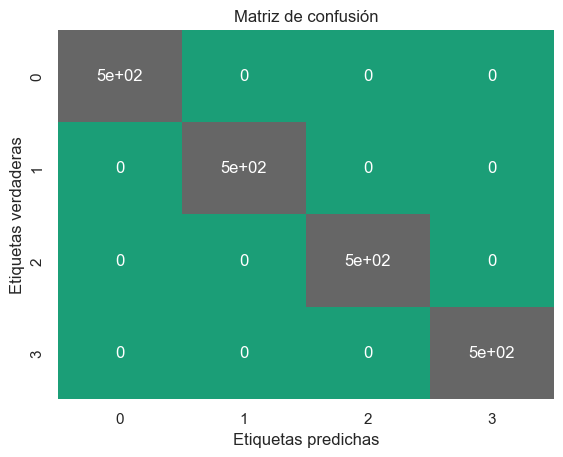

In [61]:
# Visualizamos la matriz de confusión
sns.heatmap(cm, annot=True, cbar=False, cmap='Dark2')
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [62]:
import os

if not os.path.exists('output_directory_regression'):
    os.mkdir('output_directory_regression')


In [63]:
# Guardamos el modelo de Regresión Logística
import joblib
joblib.dump(logistic_model, 'output_directory_regression/logistic_regression.pkl')


['output_directory_regression/logistic_regression.pkl']